<a href="https://colab.research.google.com/github/zdanielshi/data_science_LFZ/blob/main/DS0614_loans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
loans = pd.read_csv('/content/LoansDataset.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
loans

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111102,503f01e2-c3c4-4b10-886e-f15de57b6f1a,27a17610-1d8c-48a7-b0db-2d81a4fa099a,Fully Paid,15654,Long Term,686.0,10+ years,Rent,43050.0,Debt Consolidation,889.69,14.1,49.0,18,0,14730,29757,0.0,0.0
111103,8af53bc0-56a4-4801-a960-52a46a90b33f,c124ca71-f42a-47cc-8ec2-236f7e9868a5,Fully Paid,15237,Short Term,706.0,10+ years,Home Mortgage,60948.0,Debt Consolidation,700.9,15.9,48.0,11,0,17733,23060,0.0,0.0
111104,96efd327-f965-42ae-8b2b-d2555205ce19,7d959a54-8eeb-4df6-b582-046f889e4cff,Fully Paid,10413,Short Term,719.0,5 years,Home Mortgage,66945.0,Debt Consolidation,1210.59,8.7,NaN,11,0,5205,6348,0.0,0.0
111105,ec19166c-70c5-4d49-adb6-fb3fc15024a2,5723fbf2-1ce8-4752-8bee-1bebf339f278,Fully Paid,34447,Short Term,626.0,10+ years,Home Mortgage,78736.0,Debt Consolidation,1476.3,30.4,9.0,12,0,32318,37580,0.0,0.0


In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

Columns with null values:
* Credit score - same as annual income
* Annual income - same as credit score
* Years in current job
* Months since last delinquent - more than 50% null, consider dropping this column
* Bankruptcies
* Tax liens

Objects that may be important:
* Loan status
* Years in current job
* Home ownership
* Monthly debt - should be convereted from object to float
* Max open credit - should be converted to float

In [ ]:
# sns.pairplot(loans)

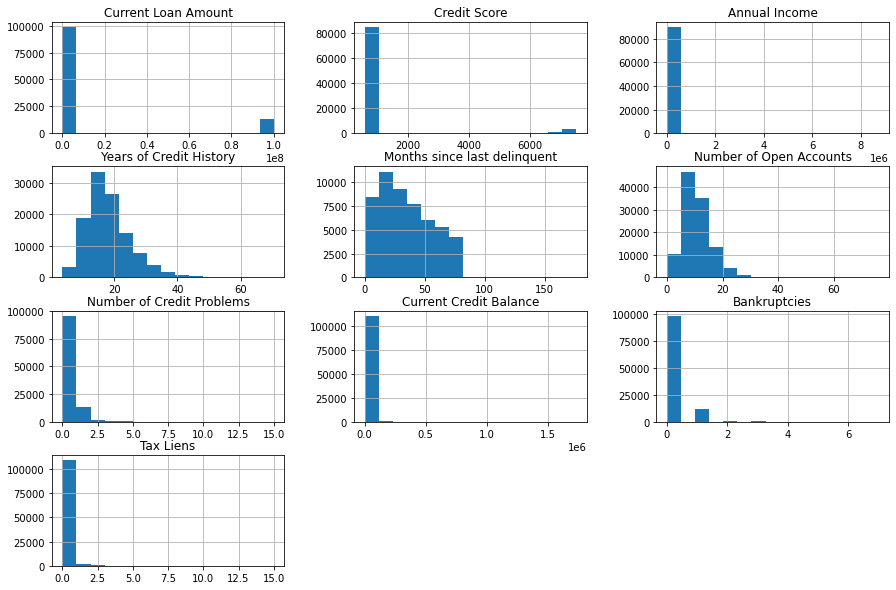

In [ ]:
loans.hist(figsize=(15,10), bins = 15);

## Data clean up

### Current Loan Value has a lot of 9999999 values, which are effective NaN

In [ ]:
loans['Current Loan Amount'].value_counts()

99999999    12738
10166          31
10151          31
9827           30
4953           29
            ...  
13376           1
18136           1
12522           1
12348           1
24629           1
Name: Current Loan Amount, Length: 22541, dtype: int64

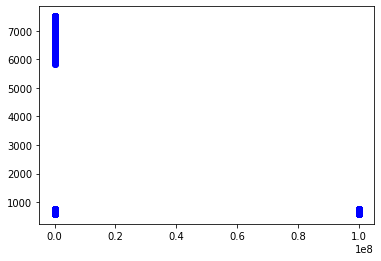

In [ ]:
x = loans['Current Loan Amount']
y = loans['Credit Score']

plt.scatter(x, y, c = 'blue')


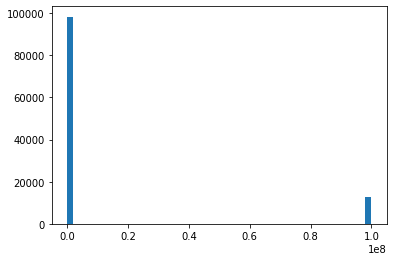

In [ ]:
plt.hist(loans['Current Loan Amount'], bins = 50);

In [ ]:
loans['Current Loan Amount'].replace(99999999.0,np.NaN,inplace=True)

In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           98369 non-null   float64
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

### Cleaning up credit scores data

What's going on with all of the credit scores above and below 1000?

In [ ]:
cs_over_1k = loans[loans['Credit Score'] > 1000]
cs_under_1k = loans[loans['Credit Score'] < 1000]

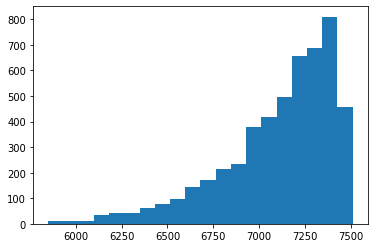

In [ ]:
plt.hist(cs_over_1k['Credit Score'], bins = 20);

In [ ]:
cs_over_1k['Credit Score'].describe()

count    5044.000000
mean     7109.046392
std       306.062776
min      5850.000000
25%      6950.000000
50%      7190.000000
75%      7350.000000
max      7510.000000
Name: Credit Score, dtype: float64

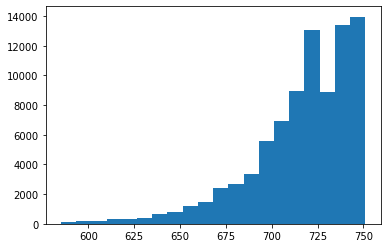

In [ ]:
plt.hist(cs_under_1k['Credit Score'], bins = 20);

In [ ]:
cs_under_1k['Credit Score'].describe()

count    84725.000000
mean       716.612735
std         28.112959
min        585.000000
25%        704.000000
50%        722.000000
75%        739.000000
max        751.000000
Name: Credit Score, dtype: float64

There's an error here where some credit scores have the decimal point in the wrong place. All of the scores over 1,000 need to have the decimal point moved 1 place to the left.

In [ ]:
loans['Credit Score'].describe()

count    89769.000000
mean      1075.795029
std       1474.133505
min        585.000000
25%        705.000000
50%        724.000000
75%        741.000000
max       7510.000000
Name: Credit Score, dtype: float64

In [ ]:
loans['Credit Score'][loans['Credit Score'] > 1000] = loans['Credit Score'][loans['Credit Score'] > 1000].div(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
loans['Credit Score'].describe()

count    89769.000000
mean       716.292005
std         28.289263
min        585.000000
25%        703.000000
50%        722.000000
75%        738.000000
max        751.000000
Name: Credit Score, dtype: float64

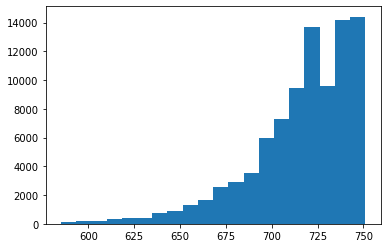

In [ ]:
plt.hist(loans['Credit Score'],bins=20);

### Cleaning up mixed value columns for Monthly Debt and Max Open Credit

In [ ]:
# check out monthly debt
loans['Monthly Debt'].apply(type).value_counts()

<class 'str'>      65536
<class 'float'>    45571
Name: Monthly Debt, dtype: int64

In [ ]:
# convert monthly debt to float
loans['Monthly Debt'] = loans['Monthly Debt'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)

In [ ]:
loans['Monthly Debt'].apply(type).value_counts()

<class 'float'>    111107
Name: Monthly Debt, dtype: int64

In [ ]:
# check out maximum open credit
loans['Maximum Open Credit'].apply(type).value_counts()

<class 'str'>    65536
<class 'int'>    45571
Name: Maximum Open Credit, dtype: int64

In [ ]:
# fix index 4930 #VALUE

loans.loc[4930,'Maximum Open Credit'] = 0
loans.loc[37357,'Maximum Open Credit'] = 0

In [ ]:
loans[loans['Maximum Open Credit'] == '#VALUE!']

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


In [ ]:
# convert all other cells
loans['Maximum Open Credit'] = loans['Maximum Open Credit'].apply(lambda x: x.replace('$', '').replace(',', '')
                                 if isinstance(x, str) else x).astype(float)

### Deep dive into Years in Current Job

In [ ]:
loans['Years in current job'].value_counts()

10+ years    34551
2 years      10158
3 years       9133
< 1 year      9055
5 years       7559
1 year        7175
4 years       6828
6 years       6310
7 years       6186
8 years       5105
9 years       4354
Name: Years in current job, dtype: int64

In [ ]:
loans['Years in current job'].replace(['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'],[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)

In [ ]:
loans['Years in current job'].value_counts()

10.0    34551
2.0     10158
3.0      9133
0.0      9055
5.0      7559
1.0      7175
4.0      6828
6.0      6310
7.0      6186
8.0      5105
9.0      4354
Name: Years in current job, dtype: int64

### Deep dive into Annual Income

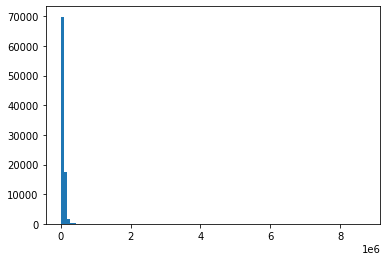

In [ ]:
plt.hist(loans['Annual Income'], bins=100);

In [ ]:
loans['Annual Income'].describe(percentiles = [.25, .50, .75, .99])

count    8.976900e+04
mean     7.248600e+04
std      5.593094e+04
min      4.033000e+03
25%      4.468800e+04
50%      6.175200e+04
75%      8.688700e+04
99%      2.414160e+05
max      8.713547e+06
Name: Annual Income, dtype: float64

In [ ]:
loans['Annual Income'].median()

61752.0

There are some super outlier incomes. The 99 percentile is 240K.

(array([ 2374., 18319., 24960., 18650., 11213.,  5673.,  3330.,  1966.,
         1004.,   674.]),
 array([  4033. ,  23627.7,  43222.4,  62817.1,  82411.8, 102006.5,
        121601.2, 141195.9, 160790.6, 180385.3, 199980. ]),
 <a list of 10 Patch objects>)

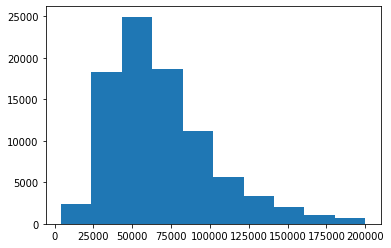

In [ ]:
plt.hist(loans['Annual Income'][loans['Annual Income'] < 200000])

In [ ]:
loans[loans['Annual Income'] > 200000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1606 entries, 182 to 111097
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       1606 non-null   object 
 1   Customer ID                   1606 non-null   object 
 2   Loan Status                   1606 non-null   object 
 3   Current Loan Amount           1365 non-null   float64
 4   Term                          1606 non-null   object 
 5   Credit Score                  1606 non-null   float64
 6   Years in current job          1594 non-null   float64
 7   Home Ownership                1606 non-null   object 
 8   Annual Income                 1606 non-null   float64
 9   Purpose                       1606 non-null   object 
 10  Monthly Debt                  1606 non-null   float64
 11  Years of Credit History       1606 non-null   float64
 12  Months since last delinquent  856 non-null    float64
 13 

In [ ]:
loans['Annual Income'][loans['Annual Income'] > 200000].count()
corr_check = loans[loans['Annual Income'] < 100000].corr()
corr_check[['Annual Income']]

,Annual Income
Current Loan Amount,0.464115
Credit Score,-0.005544
Years in current job,0.178496
Annual Income,1.000000
Monthly Debt,0.541002
Years of Credit History,0.173280
Months since last delinquent,-0.061603
Number of Open Accounts,0.211070
Number of Credit Problems,-0.011849
Current Credit Balance,0.316751


# Check the heatmap for correlations

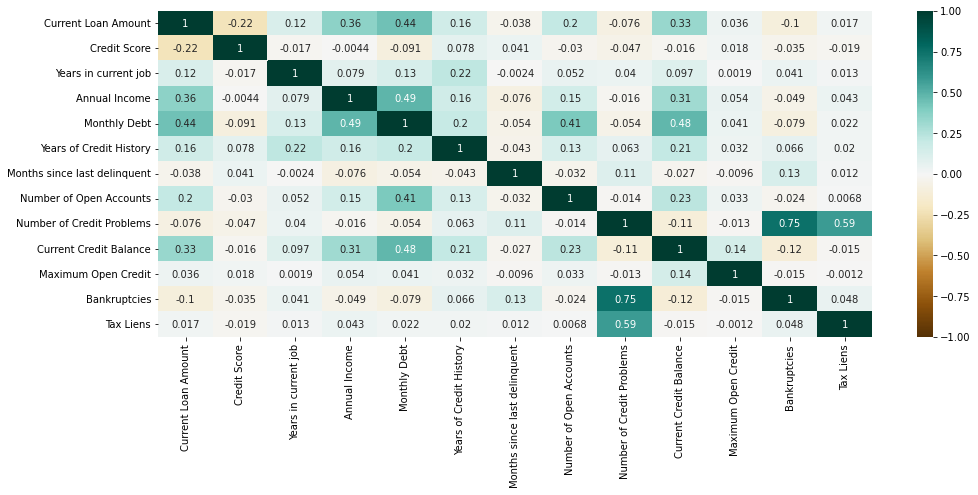

In [ ]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(loans.corr(),vmin=-1, vmax=1, annot=True, cmap = 'BrBG')

* Credit score - same as annual income
  * Years in current job
  * Annual income
  * Years of Credit History
  * Home ownership
* Annual income - same as credit score
  * Monthly Debt
  * Current credit balance
  * Number of Open Accounts
  * Years of Credit history
  * Years in current job
* Years in current job
  * Years of credit history
  * Monthly debt
  * Current loan amount
  * Current credit balance
* Months since last delinquent - going to drop this column
* Bankruptcies
  * Number of credit problems - VERY high
* Tax liens
  * Number of Credit problems - VERY high
* Current Loan Amounts - think about what to do here, I made a bunch of values NaN
  * Annual income
  * Monthly debt
  * Current credit balance
  * 

# Fill in the nulls

In [ ]:
loans.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount             12738
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      228
Tax Liens                          11
dtype: int64

## Current loan amount
Look at
  * Annual income
  * Monthly debt
  * Current credit balance

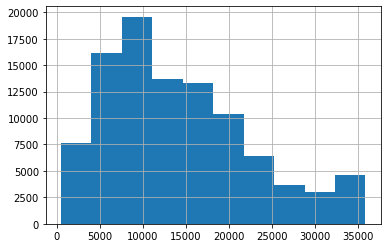

In [ ]:
loans['Current Loan Amount'].hist()

In [ ]:
loans['Current Loan Amount'].fillna(loans.groupby('Annual Income')['Current Loan Amount'].transform('median'), inplace=True)

There are still some null values for loans. Use monthly debt next.

In [ ]:
loans['Current Loan Amount'].fillna(loans.groupby('Monthly Debt')['Current Loan Amount'].transform('median'),inplace=True)

In [ ]:
loans.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount              1836
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      228
Tax Liens                          11
dtype: int64

Try using current credit balance to fill in more

In [ ]:
loans['Current Loan Amount'].fillna(loans.groupby('Current Credit Balance')['Current Loan Amount'].transform('median'),inplace=True)

In [ ]:
loans.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount               385
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      228
Tax Liens                          11
dtype: int64

Fill in the remainder using the median for Current Loan Amounts

In [ ]:
loans['Current Loan Amount'].fillna(loans['Current Loan Amount'].median(), inplace=True)

In [ ]:
loans.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      228
Tax Liens                          11
dtype: int64

## Annual income
* Monthly Debt
* Current credit balance
* Number of Open Accounts
* Years of Credit history
* Years in current job

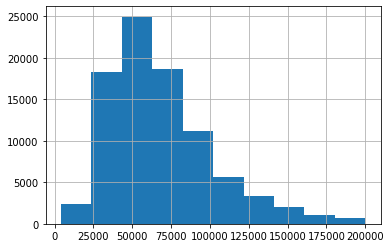

In [ ]:
# isolate out incomes over $200K, since those are above the 99th percentile, but really skew things
loans['Annual Income'][loans['Annual Income'] < 200000].hist();

In [ ]:
# try monthly debt
loans['Annual Income'].fillna(loans.groupby('Monthly Debt')['Annual Income'].transform('median'), inplace=True)

In [ ]:
loans.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                   10741
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      228
Tax Liens                          11
dtype: int64

In [ ]:
# try current credit balance
loans['Annual Income'].fillna(loans.groupby('Current Credit Balance')['Annual Income'].transform('median'), inplace=True)

In [ ]:
loans.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                    1986
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      228
Tax Liens                          11
dtype: int64

In [ ]:
# try number of open accounts
loans['Annual Income'].fillna(loans.groupby('Number of Open Accounts')['Annual Income'].transform('median'), inplace=True)

In [ ]:
loans.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                       0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      228
Tax Liens                          11
dtype: int64

## Bankruptcies
* Number of credit problems - VERY high

In [ ]:
loans['Bankruptcies'].value_counts(normalize=True)

0.0    0.889709
1.0    0.104736
2.0    0.004221
3.0    0.000992
4.0    0.000244
5.0    0.000072
6.0    0.000018
7.0    0.000009
Name: Bankruptcies, dtype: float64

In [ ]:
# try number of credit problems
loans['Bankruptcies'].fillna(loans.groupby('Number of Credit Problems')['Bankruptcies'].transform('median'), inplace=True)

In [ ]:
loans.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                       0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                        0
Tax Liens                          11
dtype: int64

## Tax Liens
* Number of Credit problems - VERY high

In [ ]:
loans['Tax Liens'].value_counts()

0.0     108964
1.0       1485
2.0        408
3.0        124
4.0         66
5.0         19
6.0         12
7.0          7
9.0          5
8.0          2
11.0         2
15.0         1
10.0         1
Name: Tax Liens, dtype: int64

In [ ]:
# try number of credit problems
loans['Tax Liens'].fillna(loans.groupby('Number of Credit Problems')['Tax Liens'].transform('median'), inplace=True)

In [ ]:
loans.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                       0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                        0
Tax Liens                           0
dtype: int64

## Months since last delinquent - drop this

Dropping this because there are over 50% nulls

In [ ]:
loans.drop(columns = 'Months since last delinquent', inplace = True)

In [ ]:
loans.isna().sum()

Loan ID                          0
Customer ID                      0
Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 21338
Years in current job          4693
Home Ownership                   0
Annual Income                    0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              0
Bankruptcies                     0
Tax Liens                        0
dtype: int64

## Years in current job
* Years of credit history
* Monthly debt
* Current loan amount
* Current credit balance

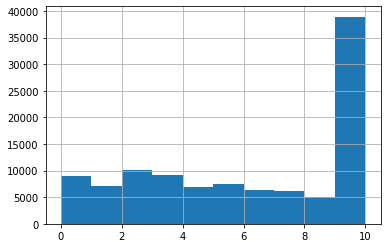

In [ ]:
loans['Years in current job'].hist();

In [ ]:
loans['Years in current job'].median()

6.0

In [ ]:
loans['Years in current job'].value_counts()

10.0    34551
2.0     10158
3.0      9133
0.0      9055
5.0      7559
1.0      7175
4.0      6828
6.0      6310
7.0      6186
8.0      5105
9.0      4354
Name: Years in current job, dtype: int64

In [ ]:
# try years of credit history
loans['Years in current job'].fillna(loans.groupby('Years of Credit History')['Years in current job'].transform('median'), inplace=True)

In [ ]:
loans.isna().sum()

Loan ID                          0
Customer ID                      0
Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 21338
Years in current job            20
Home Ownership                   0
Annual Income                    0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              0
Bankruptcies                     0
Tax Liens                        0
dtype: int64

In [ ]:
# try monthly debt
loans['Years in current job'].fillna(loans.groupby('Monthly Debt')['Years in current job'].transform('median'), inplace=True)

In [ ]:
loans.isna().sum()

Loan ID                          0
Customer ID                      0
Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 21338
Years in current job            18
Home Ownership                   0
Annual Income                    0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              0
Bankruptcies                     0
Tax Liens                        0
dtype: int64

In [ ]:
# try current loan amount
loans['Years in current job'].fillna(loans.groupby('Current Loan Amount')['Years in current job'].transform('median'), inplace=True)

In [ ]:
loans.isna().sum()

Loan ID                          0
Customer ID                      0
Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 21338
Years in current job             1
Home Ownership                   0
Annual Income                    0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              0
Bankruptcies                     0
Tax Liens                        0
dtype: int64

In [ ]:
# try current credit balance
loans['Years in current job'].fillna(loans.groupby('Current Credit Balance')['Years in current job'].transform('median'), inplace=True)

In [ ]:
loans.isna().sum()

Loan ID                          0
Customer ID                      0
Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 21338
Years in current job             1
Home Ownership                   0
Annual Income                    0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              0
Bankruptcies                     0
Tax Liens                        0
dtype: int64

In [ ]:
# fill in with the median for the remaining value
loans['Years in current job'].fillna(loans['Years in current job'].median(), inplace=True)

In [ ]:
loans.isna().sum()

Loan ID                          0
Customer ID                      0
Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 21338
Years in current job             0
Home Ownership                   0
Annual Income                    0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              0
Bankruptcies                     0
Tax Liens                        0
dtype: int64

## Credit score

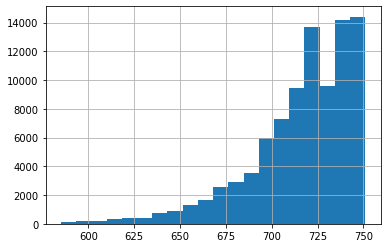

In [ ]:
loans['Credit Score'].hist(bins = 20)

In [ ]:
# try years in current job
loans['Credit Score'].fillna(loans.groupby('Years in current job')['Credit Score'].transform('median'), inplace=True)

In [ ]:
loans.isna().sum()

Loan ID                      0
Customer ID                  0
Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Years in current job         0
Home Ownership               0
Annual Income                0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

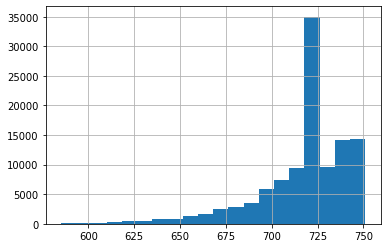

In [ ]:
loans['Credit Score'].hist(bins = 20)